In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Part 1: Understanding Product Categories


In [4]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

## Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [7]:
category_counts = df['category'].value_counts()

In [10]:
top_5_categories = category_counts.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

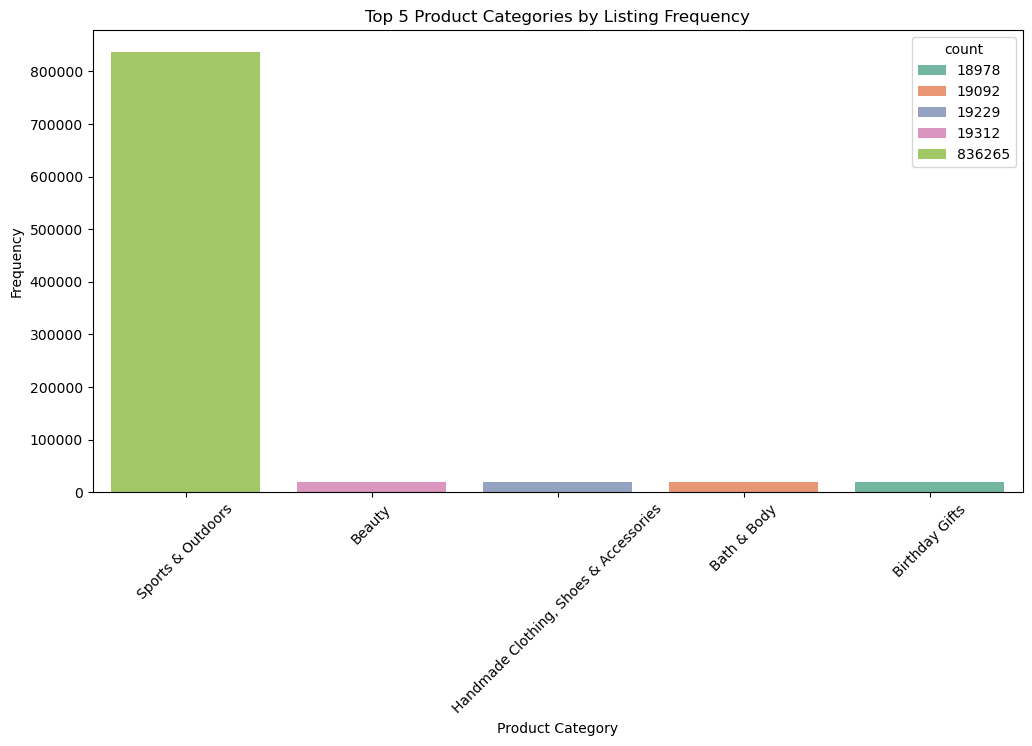

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set2", hue=top_5_categories)
plt.title('Top 5 Product Categories by Listing Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

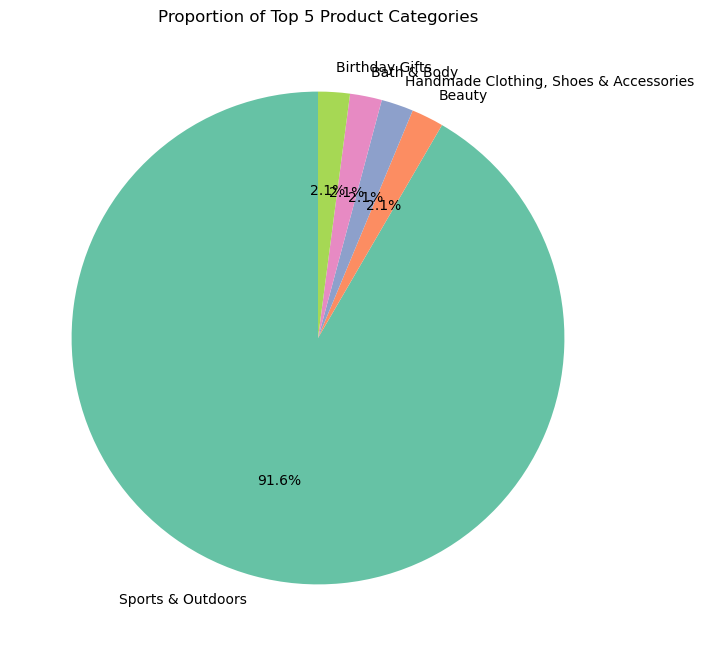

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

# Part 2: Delving into Product Pricing

## Measures of Centrality:

Calculate the mean, median, and mode for the price of products.

In [14]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # mode() returns a Series, so take the first mode

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

What's the average price point of products listed? How does this compare with the most common price point (mode)?

Average Price Point: The mean gives you an overall average price.

Most Common Price Point: The mode indicates the most frequent price listed.

## Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
quantiles = df['price'].quantile([0.25, 0.75])
iqr_price = quantiles[0.75] - quantiles[0.25]

variance_price, std_dev_price, range_price, quantiles, iqr_price

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.75    45.99
 Name: price, dtype: float64,
 36.0)

How varied are the product prices? Are there any indicators of a significant spread in prices?

25% of the products have a price lower than 9.99 and 75% lower than 45.99. Standard debiation is high (345) so there is a significant spread on prices.

## Visualizations:



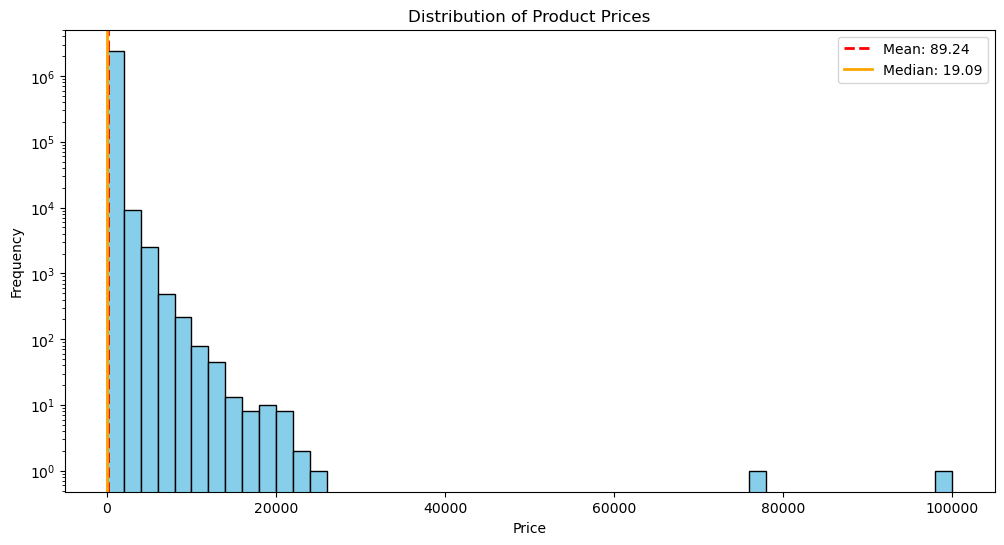

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  # If the distribution is skewed, using a logarithmic scale may help
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='orange', linestyle='solid', linewidth=2, label=f'Median: {median_price:.2f}')
plt.legend()
plt.show()

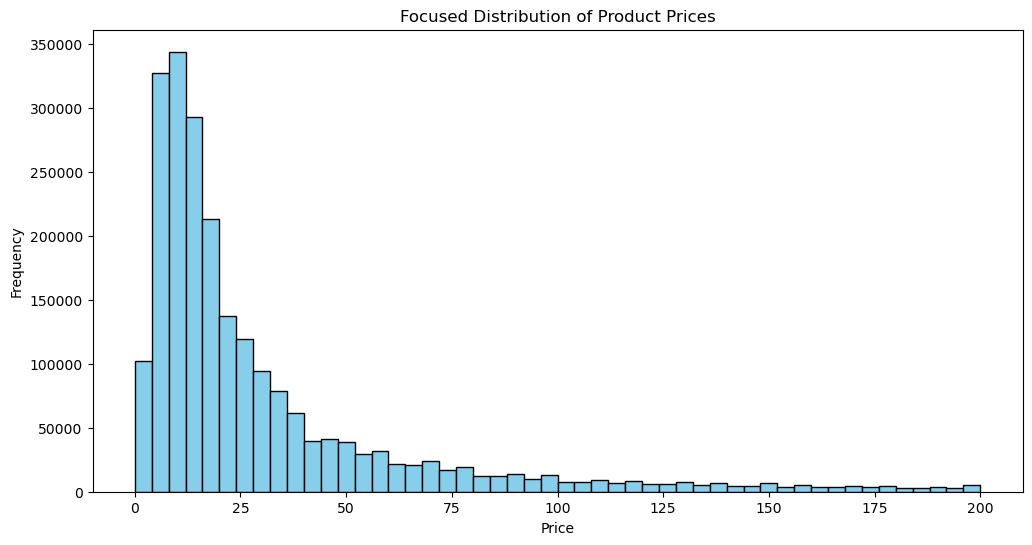

In [29]:
# Zoom in on a particular price range:
focused_prices = df[(df['price'] >= 0) & (df['price'] <= 200)]['price']

plt.figure(figsize=(12, 6))
plt.hist(focused_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Focused Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

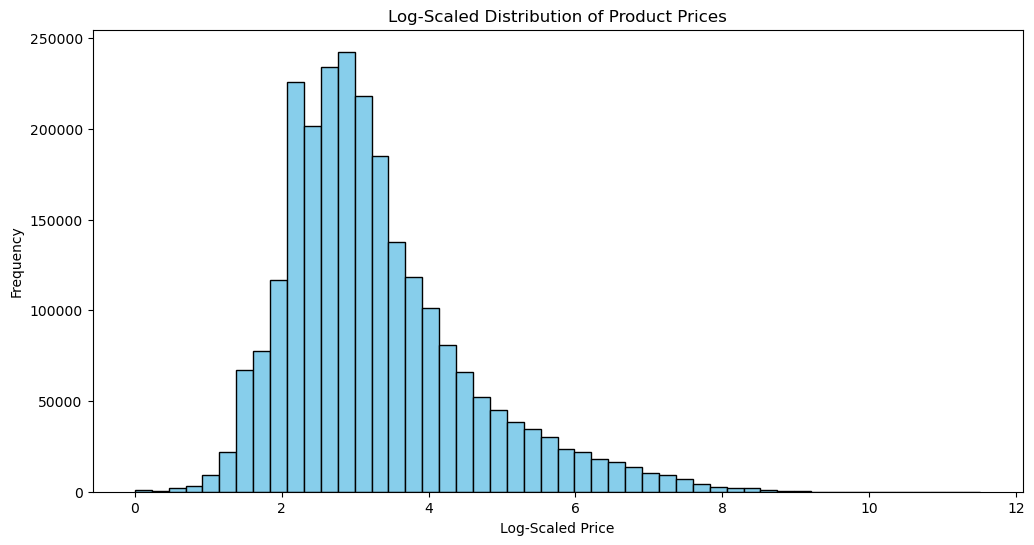

In [30]:
log_prices = np.log1p(df['price'])  # Use log1p for better handling of zeros

plt.figure(figsize=(12, 6))
plt.hist(log_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Scaled Distribution of Product Prices')
plt.xlabel('Log-Scaled Price')
plt.ylabel('Frequency')
plt.show()

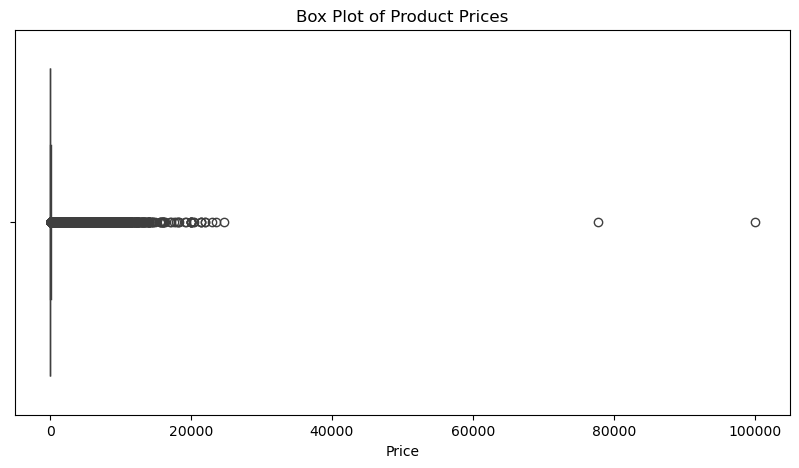

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show() # there are many outliers

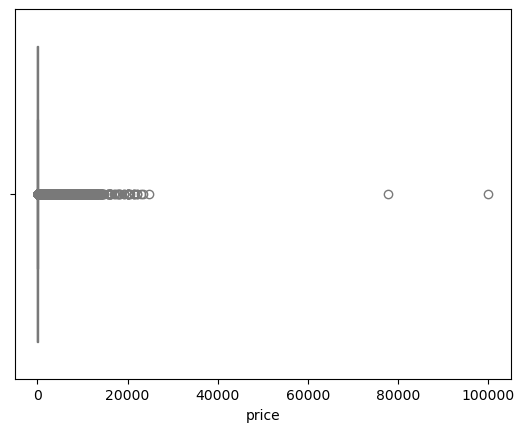

In [22]:
sns.boxplot(x = df['price']], color="lightblue")
plt.show()

# Part 3: Unpacking Product Ratings

## Measures of Centrality:

In [36]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

How do customers generally rate products? Is there a common trend?

Generally customers are not providing any ratings for the products

## Measures of Dispersion:

In [34]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
quantiles = df['stars'].quantile([0.25, 0.75])
iqr_rating = quantiles[0.75] - quantiles[0.25]

variance_rating, std_dev_rating, quantiles, iqr_rating

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.75    4.4
 Name: stars, dtype: float64,
 4.4)

Are the ratings consistent, or is there a wide variation in customer feedback?

In [38]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

Customers does not use to provide feedback, but when they doo the rating is good

## Shape of the Distribution:



In [40]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurt()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

Are the ratings normally distributed, or do they lean towards higher or lower values?

Skewness: he ratings don't lean significantly towards higher or lower values and are relatively evenly distributed around the mean.

Kurtosis: The ratings are more spread out and have fewer outliers compared to a normal distribution.

Conclusion: ratings are generally well spread without heavy tails or many extreme values (but are ranked from 0 to 5 stars). 

## Visualizations:

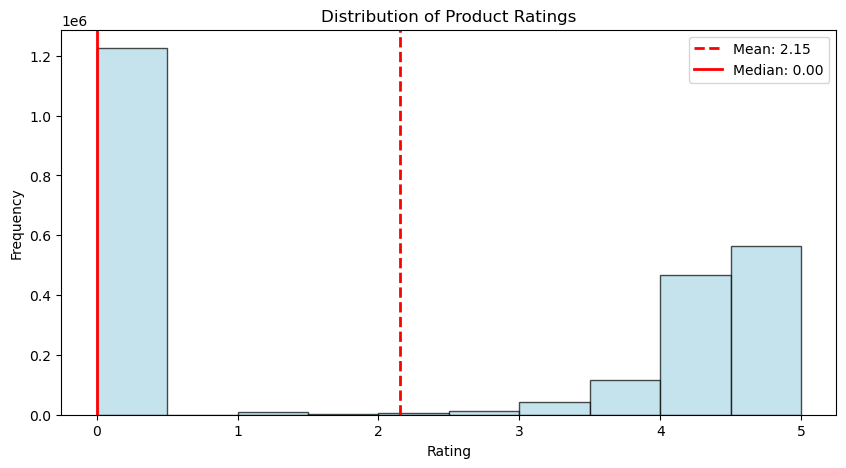

In [47]:
plt.figure(figsize=(10, 5))
plt.hist(df['stars'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='red', linestyle='solid', linewidth=2, label=f'Median: {median_rating:.2f}')
plt.legend()
plt.show()

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Yes, rating 0